# Programa Brasil na Escola

---

## Objetivos

- Verificar outliers de dataset de escolas que aderiram ao programa Brasil na Escola no Brasil;

- Estudar correlações entre as variáveis, após a limpeza;

- Expor modelo de regressão linear que sirva como preditor entre as variáveis, após a limpeza;

- Verificar se algum dos modelos obtidos consegue ter bom desempenho para os outliers.

## Fonte

<a href = "https://dados.gov.br/dados/conjuntos-dados/base-de-escolas-que-aderiram-ao-programa-brasil-na-escola"> Base de escolas que aderiram ao Programa Brasil na Escola </href>

---

## Importar Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
sns.set_style("whitegrid")

## Carregar Dataset

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df

,UF,TOTAL_ESCOLA,MATRICULAS,VERBA
0,AC,81,4660,1509000.0
1,AL,99,24862,4719300.0
2,AM,689,50753,14502950.0
3,AP,70,12150,2522500.0
4,BA,1135,230830,45974500.0
5,CE,496,68126,15178900.0
6,DF,2,1281,212150.0
7,ES,28,4486,952900.0
8,GO,31,3947,902050.0
9,MA,1690,182166,44224900.0


In [5]:
df.shape

(27, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   UF            27 non-null     object 
 1   TOTAL_ESCOLA  27 non-null     int64  
 2   MATRICULAS    27 non-null     int64  
 3   VERBA         27 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 996.0+ bytes


In [7]:
df.describe()

,TOTAL_ESCOLA,MATRICULAS,VERBA
count,27.000000,27.000000,2.700000e+01
mean,294.000000,43153.740741,9.413061e+06
std,418.356675,59385.263836,1.289032e+07
min,2.000000,1223.000000,2.121500e+05
25%,31.000000,4284.000000,9.376000e+05
50%,99.000000,18711.000000,4.366650e+06
75%,347.000000,50537.000000,1.079422e+07
max,1690.000000,230830.000000,4.597450e+07


In [8]:
df.isnull().sum()

UF              0
TOTAL_ESCOLA    0
MATRICULAS      0
VERBA           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

## Análise Exploratória

Visualizemos os dados usando três gráficos de barras, relacionando ``UF`` às demais colunas do dataset:

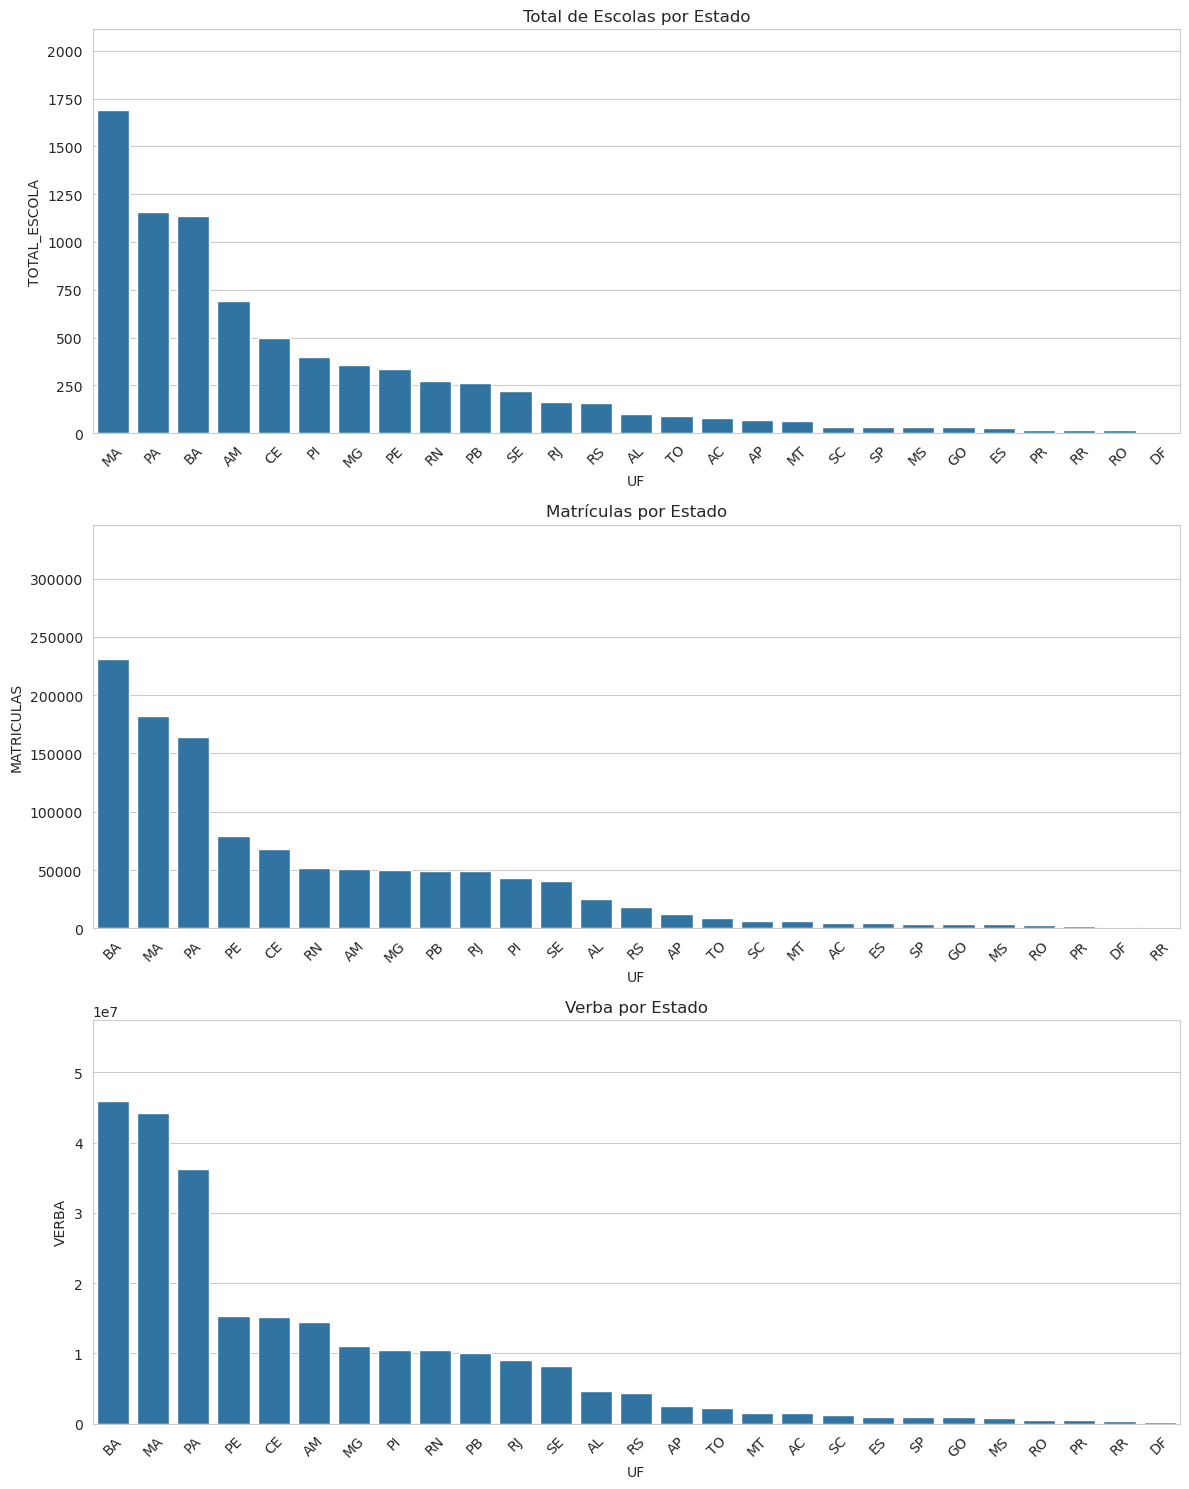

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

sns.barplot(
    data=df.sort_values("TOTAL_ESCOLA", ascending=False),
    x="UF",
    y="TOTAL_ESCOLA",
    ax=axes[0]
)
axes[0].set_title("Total de Escolas por Estado")
axes[0].set_ylim(0, max(df["TOTAL_ESCOLA"]) * 1.25)
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(
    data=df.sort_values("MATRICULAS", ascending=False),
    x="UF",
    y="MATRICULAS",
    ax=axes[1]
)

axes[1].set_title("Matrículas por Estado")
axes[1].set_ylim(0, max(df["MATRICULAS"]) * 1.5)
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(
    data=df.sort_values("VERBA", ascending=False),
    x="UF",
    y="VERBA",
    ax=axes[2]
)
axes[2].set_title("Verba por Estado")
axes[2].set_ylim(0, max(df["VERBA"]) * 1.25)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

As mesmas informações representamos abaixo em boxplot (por região, para melhor visualização):

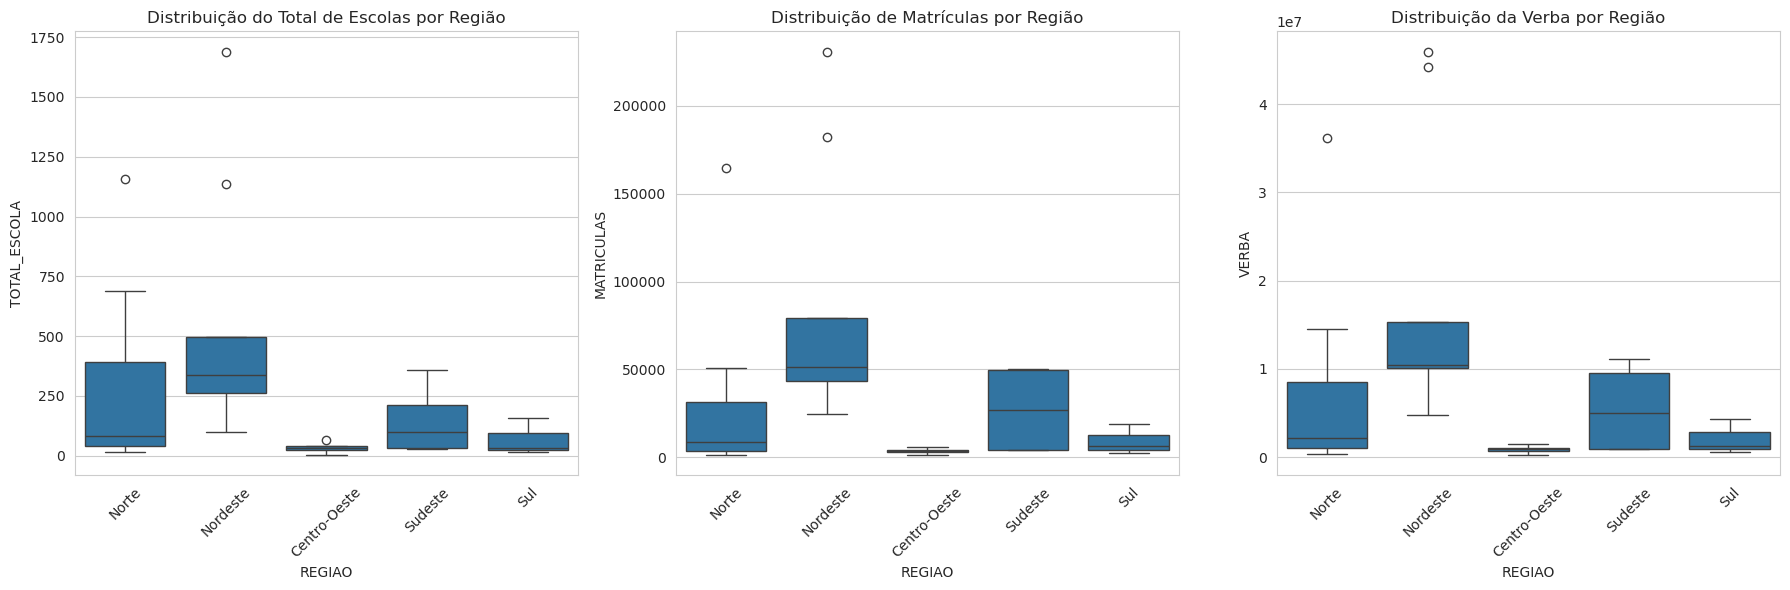

In [11]:
df_regions = df.copy()

regioes = {
    "Norte": ["AC", "AM", "AP", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MT", "MS"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}

df_regions["REGIAO"] = df["UF"].map({uf: regiao for regiao, ufs in regioes.items() for uf in ufs})

ordem_regioes = ["Norte", "Nordeste", "Centro-Oeste", "Sudeste", "Sul"]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(
    data=df_regions,
    x="REGIAO",
    y="TOTAL_ESCOLA",
    order=ordem_regioes,
    ax=axes[0]
)

axes[0].set_title("Distribuição do Total de Escolas por Região")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(
    data=df_regions,
    x="REGIAO",
    y="MATRICULAS",
    order=ordem_regioes,
    ax=axes[1]
)

axes[1].set_title("Distribuição de Matrículas por Região")
axes[1].tick_params(axis='x', rotation=45)

sns.boxplot(
    data=df_regions,
    x="REGIAO",
    y="VERBA", 
    order=ordem_regioes,
    ax=axes[2]
)

axes[2].set_title("Distribuição da Verba por Região")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

Notamos outliers marcantes na região nordeste do Brasil. Além disso, é perceptível a relação entre matrículas e verba.

## Feature engineering

Podemos também investigar a relação de matrículas por escola em cada UF:

In [12]:
df['MATRICULAS_ESCOLA'] = df['MATRICULAS']/df['TOTAL_ESCOLA']

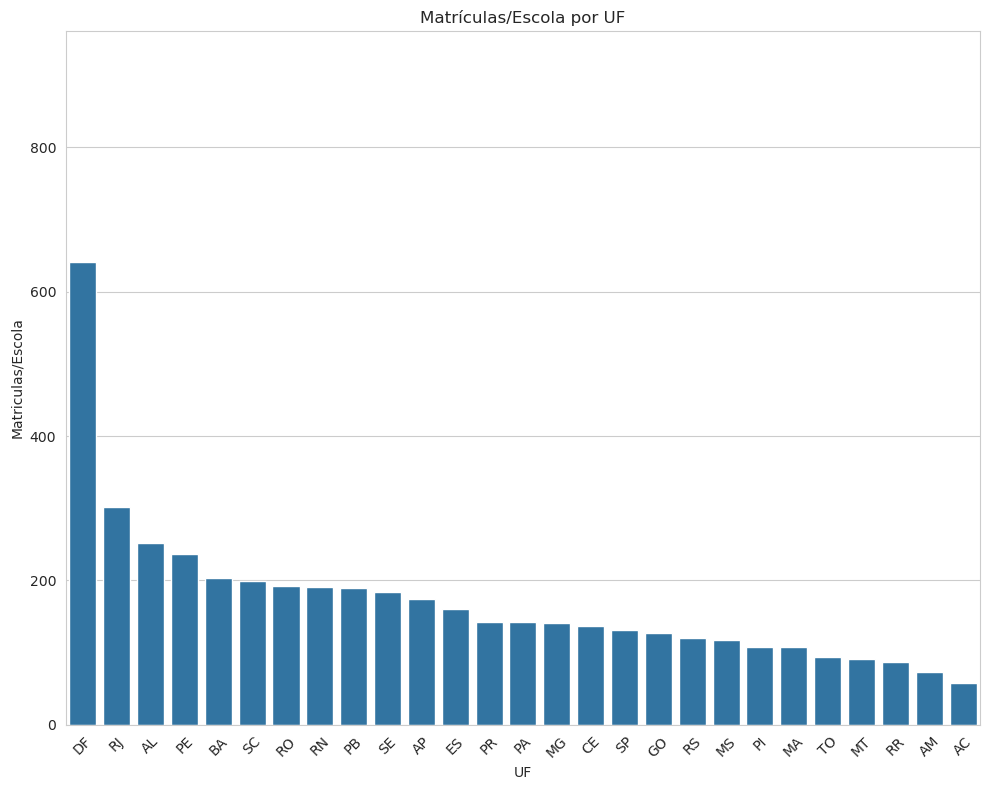

In [13]:
plt.figure(figsize = (10, 8))

sns.barplot(
    data = df.sort_values(by = 'MATRICULAS_ESCOLA', ascending = False),
    x = 'UF',
    y = 'MATRICULAS_ESCOLA'
)

plt.title('Matrículas/Escola por UF')
plt.ylim(0, max(df['MATRICULAS_ESCOLA']) * 1.5)
plt.xticks(rotation=45)
plt.ylabel('Matriculas/Escola')

plt.tight_layout()

plt.show()

In [14]:
df['MATRICULAS_ESCOLA'].median()

np.float64(142.06136560069143)

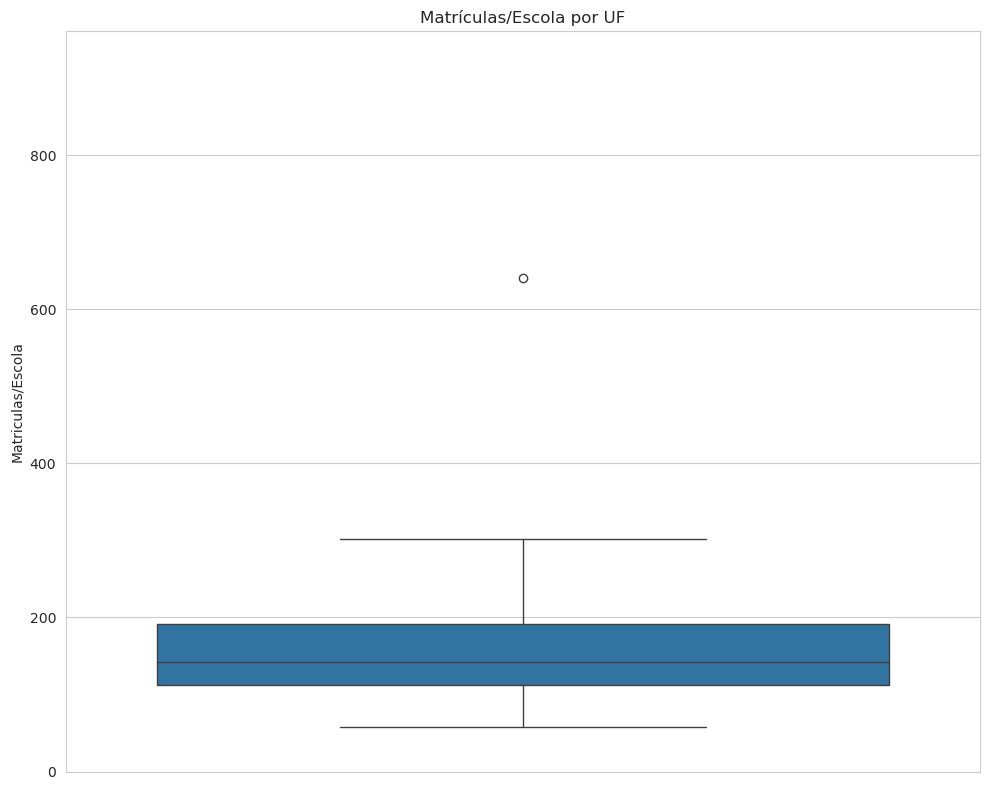

In [15]:
plt.figure(figsize = (10, 8))

sns.boxplot(
    data = df.sort_values(by = 'MATRICULAS_ESCOLA', ascending = False),
    y = 'MATRICULAS_ESCOLA'
)

plt.title('Matrículas/Escola por UF')
plt.ylim(0, max(df['MATRICULAS_ESCOLA']) * 1.5)
plt.xticks(rotation=45)
plt.ylabel('Matriculas/Escola')

plt.tight_layout()

plt.show()

Notamos, pois, que é no Distrito Federal que há um sobressalto em relação às demais UFs em termos de matrículas por escola.

Outra grandeza que podemos tentar mensurar é verbas por matrícula:

In [16]:
df['VERBA_MATRICULAS'] = df['VERBA'] / df['MATRICULAS']

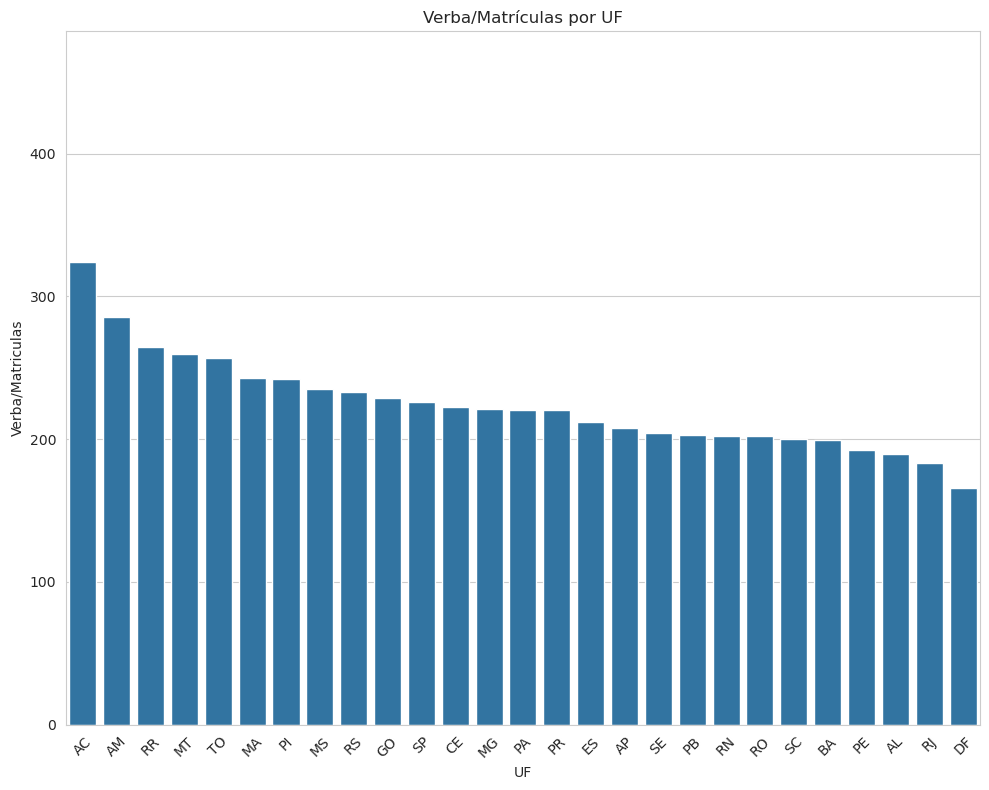

In [17]:
plt.figure(figsize = (10, 8))

sns.barplot(
    data = df.sort_values(by = 'VERBA_MATRICULAS', ascending = False),
    x = 'UF',
    y = 'VERBA_MATRICULAS'
)

plt.title('Verba/Matrículas por UF')
plt.ylim(0, max(df['VERBA_MATRICULAS']) * 1.5)
plt.xticks(rotation=45)
plt.ylabel('Verba/Matriculas')

plt.tight_layout()

plt.show()

In [18]:
df['VERBA_MATRICULAS'].median()

np.float64(220.39211510966447)

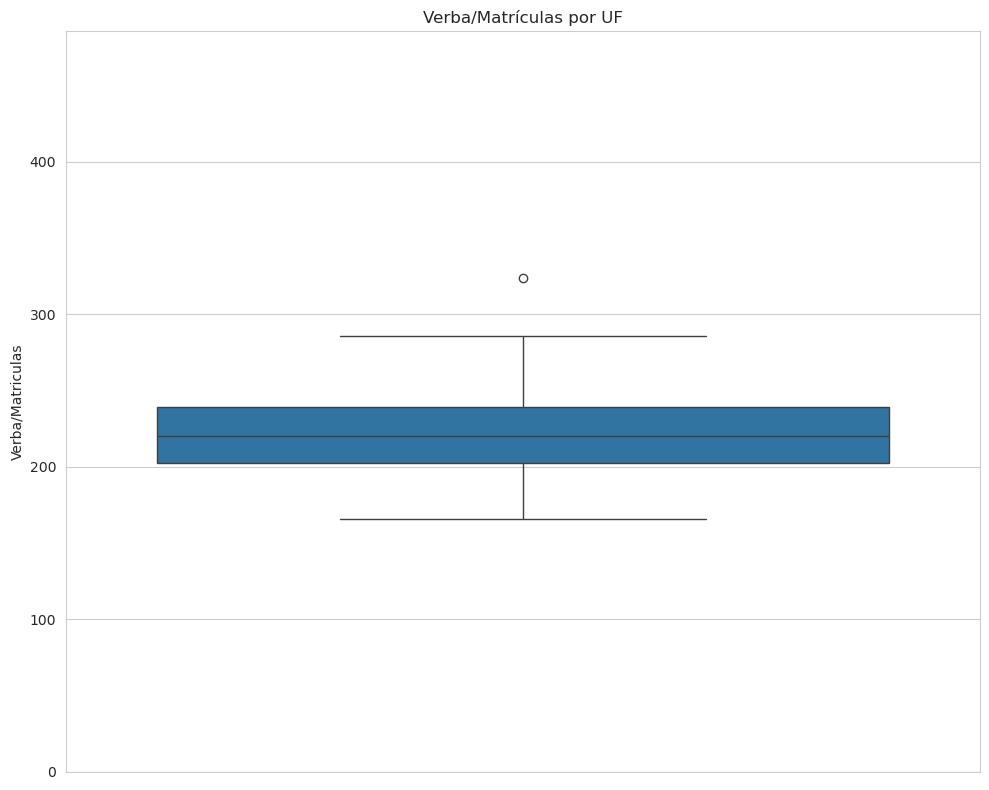

In [19]:
plt.figure(figsize = (10, 8))

sns.boxplot(
    data = df.sort_values(by = 'VERBA_MATRICULAS', ascending = False),
    y = 'VERBA_MATRICULAS'
)

plt.title('Verba/Matrículas por UF')
plt.ylim(0, max(df['VERBA_MATRICULAS']) * 1.5)
plt.xticks(rotation=45)
plt.ylabel('Verba/Matriculas')

plt.tight_layout()

plt.show()

Dessa forma, a variação de verbas por matrícula se mostra muito pouca em todas as UFs.

## Modelo Preditivo

Queremos prever a verba de uma UF com base nas outras features.

In [20]:
df_numeric = df.select_dtypes(include = {'float64', 'int64'})

In [21]:
colunas = [col for col in df_numeric.columns if col != 'VERBA'] + ['VERBA']

df_numeric = df_numeric[colunas]

In [22]:
corr = df_numeric.corr()

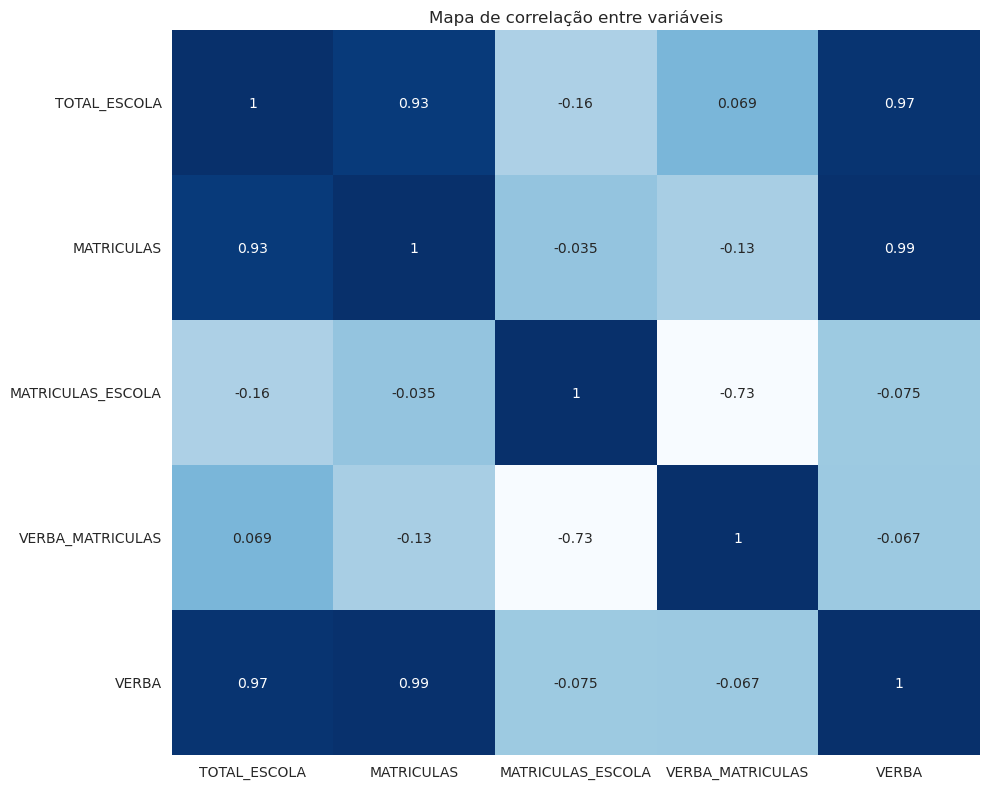

In [23]:
plt.figure(figsize = (10, 8))

sns.heatmap(
    data = corr,
    annot = True,
    cmap = 'Blues',
    cbar = False
)

plt.title('Mapa de correlação entre variáveis')

plt.tight_layout()
plt.show()

In [24]:
X = df_numeric.drop(columns = {'VERBA', 'MATRICULAS_ESCOLA', 'VERBA_MATRICULAS'})
y = df_numeric['VERBA']

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
y_predict = model.predict(X_test)

In [29]:
mse = mean_squared_error(y_test, y_predict)

In [30]:
print(f"Mean squared error: {mse: .4f}")

Mean squared error:  0.0000


In [31]:
print("=== COEFICIENTES ===")
print(f"Intercept: {model.intercept_:.4f}")

for i, coefficient in enumerate(model.coef_):
    feature_name = X.columns[i]
    print(f"{feature_name}: {coefficient:.4f}")

=== COEFICIENTES ===
Intercept: 9413061.1111
TOTAL_ESCOLA: 4105362.3470
MATRICULAS: 8741274.1531


## Conclusão

- Outliers se devem a menor correlação entre ``TOTAL_ESCOLAS`` e as outras duas variáveis, ``MATRICULAS`` e ``VERBA``. No mundo real, isso reflete como existem cidades que possuem poucas escolas, mas tem um grande contingente educacional.

- ``MATRICULAS`` possui excelente correlação com ``VERBA``, conseguindo inclusive se sair bem na previsão desses outliers.

- Em conjunto, esses dados indicam que, no repasse de verbas governamentais para o Programa, é o **número de estudantes por UF** o que tem maior correlação com ``VERBA``.